In [1]:
import pandas as pd
import numpy as np
import time
import gc
import os
import sys
import dill
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from lib import *

In [3]:

X_train, Y_train, X_test, Y_test = get_mnist_data()

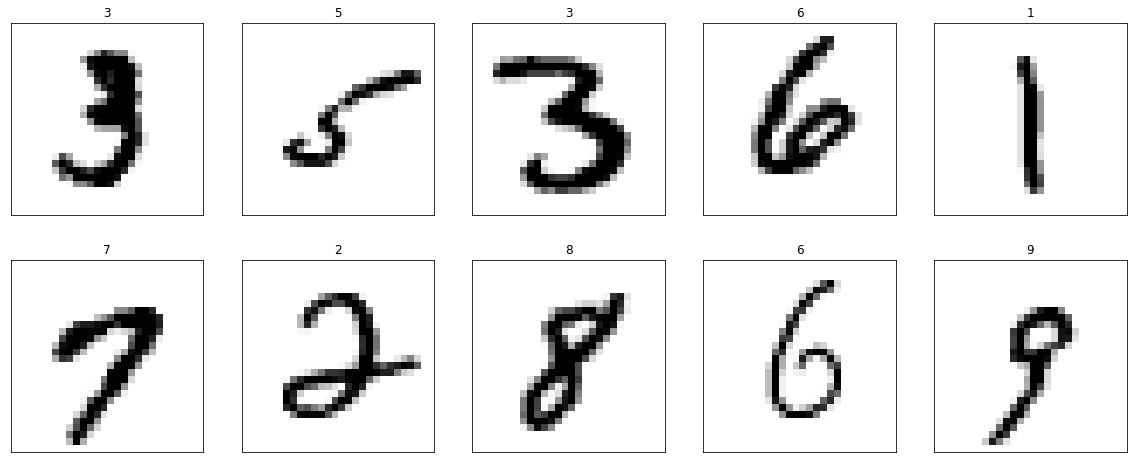

In [6]:
show_examples(X_train[10:20], Y_train[10:20],classes=get_mnist_labels())

In [5]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")

In [7]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(32, 3,3, activation='relu')) # 10
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) #4



model.add(Convolution2D(32, 3,3, activation='relu')) # 2
model.add(keras.layers.Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=1)

evaluate(model,X_train, Y_train,X_test, Y_test,classes=get_mnist_labels())


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Params =  17402
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
14336/60000 [======>.......................] - ETA: 56s - loss: 2.2919 - acc: 0.1438

KeyboardInterrupt: 